In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040241.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3        4         5         6  \
0  2.722385  2.735093  2.734115  2.722385  2.70479  2.681329  2.654936   

          7         8         9  ...      4192      4193      4194      4195  \
0  2.626588  2.597263  2.567937  ...  1.196481  1.191593  1.185728  1.178886   

       4196      4197     4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.172043  1.164223  1.15738  1.150538    117.653008      58.664437  

[1 rows x 4202 columns]
[117.65300775]  /  [58.66443664]
          0         1         2         3        4         5         6  \
0  2.722385  2.735093  2.734115  2.722385  2.70479  2.681329  2.654936   

          7         8         9  ...      4190      4191      4192      4193  \
0  2.626588  2.597263  2.567937  ...  1.214076  1.203324  1.196481  1.191593   

       4194      4195      4196      4197     4198      4199  
0  1.185728  1.178886  1.172043  1.164223  1.15738  1.150538  

[1 rows x 4200 columns]


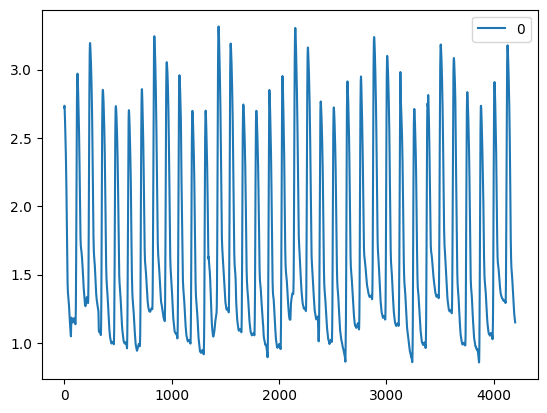

In [225]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [226]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

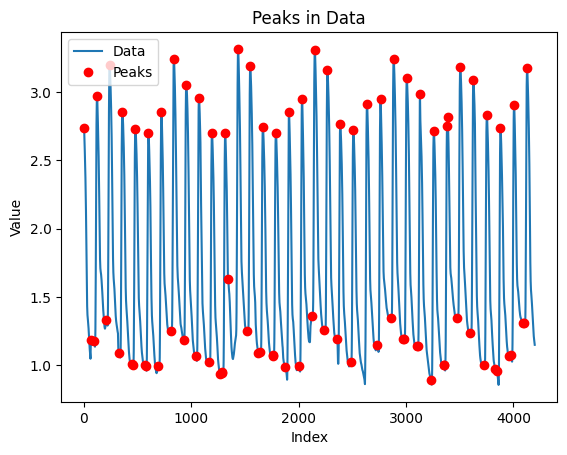

{'indices': array([   1,   67,   93,  123,  211,  240,  332,  359,  447,  455,  480,
        569,  576,  602,  694,  723,  813,  839,  930,  954, 1041, 1072,
       1166, 1194, 1266, 1286, 1291, 1317, 1344, 1437, 1521, 1549, 1626,
       1638, 1668, 1758, 1764, 1789, 1875, 1910, 2001, 2032, 2126, 2151,
       2236, 2269, 2362, 2388, 2485, 2510, 2637, 2734, 2763, 2858, 2886,
       2975, 2983, 3007, 3102, 3108, 3130, 3233, 3260, 3353, 3357, 3384,
       3389, 3477, 3505, 3596, 3628, 3722, 3753, 3831, 3845, 3880, 3956,
       3975, 4007, 4093, 4101, 4128]), 'values': array([2.73509286, 1.18572825, 1.18181818, 2.96969697, 1.33528837,
       3.19354839, 1.08797654, 2.8514174 , 1.00782014, 1.0058651 ,
       2.73216031, 1.00488759, 0.99902248, 2.7028348 , 0.99315738,
       2.85630499, 1.25513196, 3.24340176, 1.18377322, 3.05376344,
       1.07233627, 2.95796676, 1.02150538, 2.69794721, 0.93939394,
       0.94721408, 0.94819159, 2.69892473, 1.63147605, 3.31476051,
       1.25219941, 3.18963

In [227]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [228]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.735092864125122, None, None, 2.9696969696969697, None, 3.193548387096774, None, 2.8514173998044967, None, None, 2.732160312805474, None, None, 2.702834799608993, None, 2.8563049853372435, None, 3.243401759530792, None, 3.053763440860215, None, 2.9579667644183774, None, 2.697947214076246, None, None, None, 2.6989247311827955, None, 3.314760508308896, None, 3.189638318670577, None, None, 2.7438905180840663, None, None, 2.697947214076246, None, 2.850439882697948, None, 2.952101661779081, None, 3.304007820136853, None, 3.161290322580645, None, 2.766373411534702, None, 2.7223851417399803, 2.913000977517106, None, 2.949169110459433, None, 3.2375366568914954, None, None, 3.099706744868035, None, None, 2.981427174975562, None, 2.7116324535679373, None, None, 2.752688172043011, 2.8132942326490715, None, 3.182795698924731, None, 3.0840664711632453, None, 2.834799608993157, None, None, 2.735092864125122, None, None, 2.90811339198436, None, None, 3.176930596285435]
[None, 1.1857282502443791, 1.

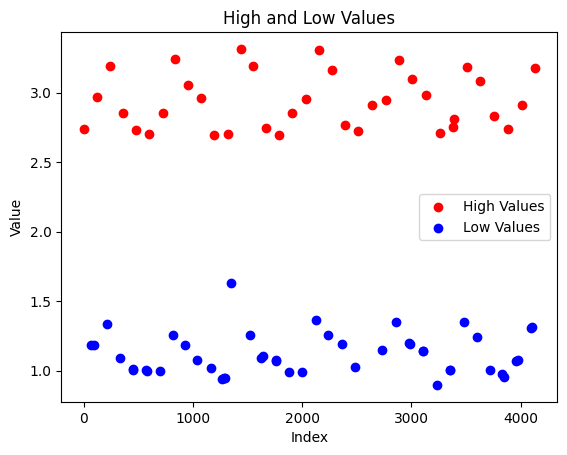

In [229]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [230]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.938226349516672
Average Low Value: 1.1207446130307281


In [231]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [232]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.938226349516672 : 0.734556587379168
Scaled value of 1.1207446130307281 : 0.28018615325768204
